<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_Procedures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and load dataset

In [287]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [288]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv',usecols=['claimcode','icdno','cptno','sacode'])

In [289]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

In [290]:
# Load claims table to get claim type
clm = pd.read_csv('/content/CLM DATA.csv',usecols=['CLAIM NO','CLAIM TYPE','SUBCLAIM TYPE'])

# Data Prep

In [291]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   claimcode  382438 non-null  int64
 1   icdno      382438 non-null  int64
 2   cptno      382438 non-null  int64
 3   sacode     382438 non-null  int64
dtypes: int64(4)
memory usage: 11.7 MB


In [292]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [293]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [294]:
clm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167064 entries, 0 to 167063
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CLAIM NO       167064 non-null  int64 
 1   CLAIM TYPE     167064 non-null  object
 2   SUBCLAIM TYPE  167064 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [295]:
# Rename CLAIM NO in clm to claimcode in preparation for merging
clm.rename(columns={"CLAIM NO": "claimcode"}, inplace=True)

# Convert claim code  into categorical data
clm['claimcode'] = clm['claimcode'].astype(str)

In [296]:
# Merge claims breakdown table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')
claims = claims[['claimcode','icdcategory','ICD DISEASE','sacode','cptno']]
claims.head()

,claimcode,icdcategory,ICD DISEASE,sacode,cptno
0,203746,84.0,Idiopathic peripheral autonomic neuropathy,3718,0
1,203913,261.0,Contact with other mammals,3747,0
2,203913,261.0,Contact with other mammals,3750,0
3,203913,261.0,Contact with other mammals,3953,0
4,203913,261.0,Contact with other mammals,3954,0


In [297]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   claimcode    382438 non-null  int64  
 1   icdcategory  382355 non-null  float64
 2   ICD DISEASE  382355 non-null  object 
 3   sacode       382438 non-null  int64  
 4   cptno        382438 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 17.5+ MB


# Drop claims with null ICD Category

In [298]:
claims.isnull().sum()

claimcode       0
icdcategory    83
ICD DISEASE    83
sacode          0
cptno           0
dtype: int64

In [299]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [300]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

claimcode      0
icdcategory    0
ICD DISEASE    0
sacode         0
cptno          0
dtype: int64

In [301]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)
claims['sacode'] = claims['sacode'].astype(int).astype(str)
claims['cptno'] = claims['cptno'].astype(int).astype(str)

# Filter claims with only 1 ICD category present

In [302]:
claims['claimcode'].value_counts().sort_values(ascending=False)

264685    50
241736    50
281217    49
226317    47
279115    46
          ..
404850     1
404851     1
404852     1
404854     1
658022     1
Name: claimcode, Length: 166947, dtype: int64

In [303]:
claims[claims['claimcode']=='264685']

,claimcode,icdcategory,ICD DISEASE,sacode,cptno
85184,264685,107,Congestive heart failure,4020,0
85185,264685,107,Congestive heart failure,3976,0
85186,264685,107,Congestive heart failure,3800,0
85187,264685,107,Congestive heart failure,3889,0
85188,264685,107,Congestive heart failure,3889,0
85189,264685,107,Congestive heart failure,3952,0
85190,264685,107,Congestive heart failure,3952,0
85191,264685,107,Congestive heart failure,3952,0
85192,264685,107,Congestive heart failure,3952,0
85193,264685,107,Congestive heart failure,3956,0


In [304]:
claims[claims['claimcode']=='241736']

,claimcode,icdcategory,ICD DISEASE,sacode,cptno
44162,241736,15,"Coronavirus infection, unspecified",3712,0
44163,241736,15,"Coronavirus infection, unspecified",3821,0
44164,241736,15,"Coronavirus infection, unspecified",3816,0
44165,241736,15,"Coronavirus infection, unspecified",3712,0
44166,241736,15,"Coronavirus infection, unspecified",3979,0
44167,241736,15,"Coronavirus infection, unspecified",3745,0
44168,241736,15,"Coronavirus infection, unspecified",3747,0
44169,241736,15,"Coronavirus infection, unspecified",3750,0
44170,241736,15,"Coronavirus infection, unspecified",4007,0
44171,241736,15,"Coronavirus infection, unspecified",3844,0


In [305]:
claims_dummies = pd.get_dummies(claims['icdcategory'])
claims_dummies

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382433,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
# Consider only claims with 1 ICD category present
claims_dummies.sum(axis=1).sort_values(ascending=False)

0         1
254984    1
254993    1
254992    1
254991    1
         ..
127529    1
127528    1
127527    1
127526    1
382437    1
Length: 382355, dtype: int64

**All claims have only 1 ICD Category present.**

# Filter OP Claims

In [307]:
# Load ICD table to get ICD category
icd_desc = pd.read_csv('/content/icd_category_categorydes.csv')

# Convert icdcategory  into categorical data
icd_desc['icdcategory'] = icd_desc['icdcategory'].astype(int).astype(str)

In [308]:
# Merge the claims breakdown and main table to look up claim type
claims_icdsingle = pd.merge(claims, clm, on='claimcode', how='left')
claims_icdsingle.head()

,claimcode,icdcategory,ICD DISEASE,sacode,cptno,CLAIM TYPE,SUBCLAIM TYPE
0,203746,84,Idiopathic peripheral autonomic neuropathy,3718,0,OP,CONSULTATION
1,203913,261,Contact with other mammals,3747,0,OP,EMERGENCY
2,203913,261,Contact with other mammals,3750,0,OP,EMERGENCY
3,203913,261,Contact with other mammals,3953,0,OP,EMERGENCY
4,203913,261,Contact with other mammals,3954,0,OP,EMERGENCY


In [309]:
# Merge the claims breakdown and idc category description table
claims_icdsingle = pd.merge(claims_icdsingle, icd_desc, on='icdcategory', how='left')
claims_icdsingle.head()

,claimcode,icdcategory,ICD DISEASE,sacode,cptno,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY
0,203746,84,Idiopathic peripheral autonomic neuropathy,3718,0,OP,CONSULTATION,Other disorders of the nervous system (G89-G99)
1,203913,261,Contact with other mammals,3747,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
2,203913,261,Contact with other mammals,3750,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
3,203913,261,Contact with other mammals,3953,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
4,203913,261,Contact with other mammals,3954,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)


In [310]:
# Filter OP claims
claims_op = claims_icdsingle[(claims_icdsingle['CLAIM TYPE']=='OP') & (claims_icdsingle['SUBCLAIM TYPE'] != 'ANNUAL PHYSICAL EXAMINATION') & (claims_icdsingle['SUBCLAIM TYPE'] != 'APE')]
claims_op.head()

,claimcode,icdcategory,ICD DISEASE,sacode,cptno,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY
0,203746,84,Idiopathic peripheral autonomic neuropathy,3718,0,OP,CONSULTATION,Other disorders of the nervous system (G89-G99)
1,203913,261,Contact with other mammals,3747,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
2,203913,261,Contact with other mammals,3750,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
3,203913,261,Contact with other mammals,3953,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)
4,203913,261,Contact with other mammals,3954,0,OP,EMERGENCY,Exposure to animate mechanical forces (W50-W64)


In [311]:
claims_op[claims_op['CLAIM TYPE'] == 'APE']

,claimcode,icdcategory,ICD DISEASE,sacode,cptno,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY


# Get most claimed ICD Categories

In [312]:
# Get most frequently claimed ICD Categories
claims_count = pd.DataFrame(claims_op['ICD CATEGORY'].value_counts().sort_values(ascending=False).head(5).reset_index())
claims_count

,index,ICD CATEGORY
0,Hypertensive diseases (I10-I15),44304
1,Metabolic disorders (E70-E88),21151
2,Diabetes mellitus (E08-E13),18625
3,Other disorders of glucose regulation and panc...,12037
4,Ischemic heart diseases (I20-I25),8864


In [313]:
# Rename columns
claims_count.rename(columns={"ICD CATEGORY":'claim_count',"index": "ICD Category Description"}, inplace=True)
claims_count

,ICD Category Description,claim_count
0,Hypertensive diseases (I10-I15),44304
1,Metabolic disorders (E70-E88),21151
2,Diabetes mellitus (E08-E13),18625
3,Other disorders of glucose regulation and panc...,12037
4,Ischemic heart diseases (I20-I25),8864


Text(0, 0.5, 'Number of Claims')

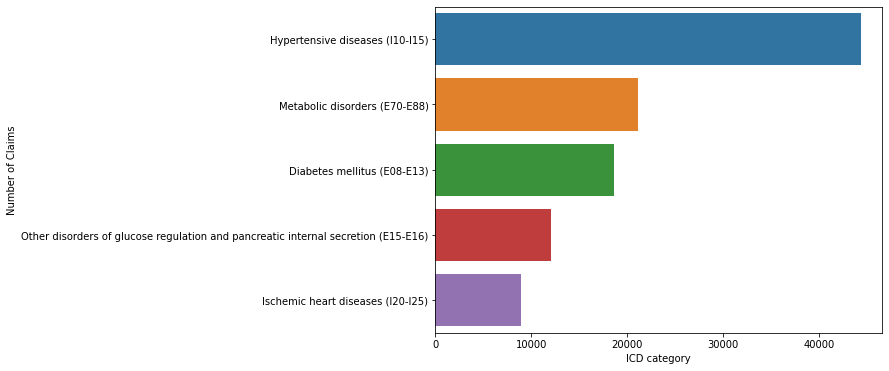

In [314]:
# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(x='claim_count', y='ICD Category Description',data=claims_count)
ax.set_xlabel('ICD category')
ax.set_ylabel('Number of Claims')

# Check procedures for ICD Category 54: Diabetes mellitus (E08-E13)

In [315]:
# Load SA table
sa_table = pd.read_excel('/content/sa_table.xlsx')

# Convert SA Code to categorical
sa_table['sacode'] = sa_table['sacode'].astype(int).astype(str)

# Merge OP Claims with SA table to get SA Description
procedures_basket = pd.merge(claims_op, sa_table, on='sacode', how='left')

procedures_basket = procedures_basket[['claimcode', 'icdcategory', 'ICD CATEGORY', 'sacode', 'SA DESCRIPTION','cptno']]
procedures_diabetes = procedures_basket[procedures_basket['icdcategory']=='54']
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno
232,211127,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0
233,211127,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0
274,211262,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0
275,211262,54,Diabetes mellitus (E08-E13),3808,LABORATORY-HEMATOLOGY,0
276,211262,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0
...,...,...,...,...,...,...
279439,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
279453,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
279462,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
279512,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0


In [316]:
# Load CPT table
cpt_table = pd.read_excel('/content/cpt_table.xlsx')

# Conver cptno to categorical
cpt_table['cptno'] = cpt_table['cptno'].astype(int).astype(str)

# Merge to get CPT of SA code=0
procedures_diabetes = pd.merge(procedures_diabetes, cpt_table, on='cptno', how='left')
procedures_diabetes = procedures_diabetes.drop(columns='CPT SECTION')

# Fill NaN
procedures_diabetes['SA DESCRIPTION'] = procedures_diabetes['SA DESCRIPTION'].fillna(procedures_diabetes['CPT DESCRIPTION'])
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION
0,211127,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0,NaN
1,211127,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0,NaN
2,211262,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0,NaN
3,211262,54,Diabetes mellitus (E08-E13),3808,LABORATORY-HEMATOLOGY,0,NaN
4,211262,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0,NaN
...,...,...,...,...,...,...,...
18620,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
18621,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
18622,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
18623,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN


In [317]:
# Removing duplicate procedures in claims, since we are only looking at the occurence of the procedure per claim
procedures_diabetes['claims_sa'] = procedures_diabetes[['claimcode', 'SA DESCRIPTION']].agg('_'.join, axis=1)
procedures_diabetes = procedures_diabetes.drop_duplicates(subset='claims_sa')
procedures_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18056 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   claimcode        18056 non-null  object
 1   icdcategory      18056 non-null  object
 2   ICD CATEGORY     18056 non-null  object
 3   sacode           18056 non-null  object
 4   SA DESCRIPTION   18056 non-null  object
 5   cptno            18056 non-null  object
 6   CPT DESCRIPTION  42 non-null     object
 7   claims_sa        18056 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [318]:
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION,claims_sa
0,211127,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0,NaN,211127_LABORATORY-ENZYMES
1,211127,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0,NaN,211127_LABORATORY-CHEMISTRY
2,211262,54,Diabetes mellitus (E08-E13),3807,LABORATORY-ENZYMES,0,NaN,211262_LABORATORY-ENZYMES
3,211262,54,Diabetes mellitus (E08-E13),3808,LABORATORY-HEMATOLOGY,0,NaN,211262_LABORATORY-HEMATOLOGY
4,211262,54,Diabetes mellitus (E08-E13),3803,LABORATORY-CHEMISTRY,0,NaN,211262_LABORATORY-CHEMISTRY
...,...,...,...,...,...,...,...,...
18620,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,616091_CONSULTATION
18621,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,623886_CONSULTATION
18622,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,624012_CONSULTATION
18623,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,643589_CONSULTATION


In [319]:
procedures_diabetes['claimcode'].value_counts().sort_values(ascending=False)

236094    14
269861    13
236577    13
236936    12
233837    12
          ..
374672     1
428201     1
428165     1
428104     1
644122     1
Name: claimcode, Length: 9508, dtype: int64

In [327]:
# Considering only claims with 2 or more procedures
procedures_diabetes = procedures_diabetes.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
procedures_diabetes['claimcode'].value_counts().sum()

12450

In [328]:
# Get list Procedures by Claim number
transactions = procedures_diabetes.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,claims_sa
0,211127,"54,54","Diabetes mellitus (E08-E13),Diabetes mellitus ...","3807,3803","LABORATORY-ENZYMES,LABORATORY-CHEMISTRY","0,0","211127_LABORATORY-ENZYMES,211127_LABORATORY-CH..."
1,211262,"54,54,54","Diabetes mellitus (E08-E13),Diabetes mellitus ...","3807,3808,3803","LABORATORY-ENZYMES,LABORATORY-HEMATOLOGY,LABOR...","0,0,0","211262_LABORATORY-ENZYMES,211262_LABORATORY-HE..."
2,211790,"54,54,54,54,54","Diabetes mellitus (E08-E13),Diabetes mellitus ...","3812,3806,3808,3803,3807","LABORATORY-MICROSCOPY,LABORATORY-ENDOCRINE / T...","0,0,0,0,0","211790_LABORATORY-MICROSCOPY,211790_LABORATORY..."
3,212095,"54,54,54,54,54,54","Diabetes mellitus (E08-E13),Diabetes mellitus ...","3816,3978,3803,3808,3812,3807","2D-ECHO,RADIOLOGY - ULTRASOUND,LABORATORY-CHEM...","0,0,0,0,0,0","212095_2D-ECHO,212095_RADIOLOGY - ULTRASOUND,2..."
4,212715,"54,54,54,54,54,54,54","Diabetes mellitus (E08-E13),Diabetes mellitus ...","3821,3803,3812,3806,3807,3808,3979","ECG,LABORATORY-CHEMISTRY,LABORATORY-MICROSCOPY...","0,0,0,0,0,0,0","212715_ECG,212715_LABORATORY-CHEMISTRY,212715_..."


In [329]:
transactions['procedures'] = transactions['SA DESCRIPTION'].apply(lambda t: t.split(','))
transactions = transactions['procedures']
transactions.head()

0           [LABORATORY-ENZYMES, LABORATORY-CHEMISTRY]
1    [LABORATORY-ENZYMES, LABORATORY-HEMATOLOGY, LA...
2    [LABORATORY-MICROSCOPY, LABORATORY-ENDOCRINE /...
3    [2D-ECHO, RADIOLOGY - ULTRASOUND, LABORATORY-C...
4    [ECG, LABORATORY-CHEMISTRY, LABORATORY-MICROSC...
Name: procedures, dtype: object

In [330]:
transaction_list = list(transactions)
transaction_list[:5]

[['LABORATORY-ENZYMES', 'LABORATORY-CHEMISTRY'],
 ['LABORATORY-ENZYMES', 'LABORATORY-HEMATOLOGY', 'LABORATORY-CHEMISTRY'],
 ['LABORATORY-MICROSCOPY',
  'LABORATORY-ENDOCRINE / THYROID FUNCTION',
  'LABORATORY-HEMATOLOGY',
  'LABORATORY-CHEMISTRY',
  'LABORATORY-ENZYMES'],
 ['2D-ECHO',
  'RADIOLOGY - ULTRASOUND',
  'LABORATORY-CHEMISTRY',
  'LABORATORY-HEMATOLOGY',
  'LABORATORY-MICROSCOPY',
  'LABORATORY-ENZYMES'],
 ['ECG',
  'LABORATORY-CHEMISTRY',
  'LABORATORY-MICROSCOPY',
  'LABORATORY-ENDOCRINE / THYROID FUNCTION',
  'LABORATORY-ENZYMES',
  'LABORATORY-HEMATOLOGY',
  'RADIOLOGY - XRAY']]

In [331]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,24 HR BLOOD PRESSURE MONITORING,2D-ECHO,ADMISSION KIT,ANTIBIOTICS,APE (ECG),ARTERIAL BLOOD GAS (ABG),BIOMETRY,BONE DENSITOMETRY,CAROTID DUPLEX SCAN,CENTRAL SUPPLIES,...,REFRACTION,REMOVAL OF SUTURES AND DRESSING,RETINOSCOPY,SLIT LAMP EXAMINATION,SPECIALTY CLINIC,SURGICAL PROCEDURE,TEAR BREAK UP TIME,TONOMETRY,TREADMILL,UROFLOWMETRY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori

In [333]:
# Choose max_len
procedures_diabetes['claimcode'].value_counts().describe()

count    3902.000000
mean        3.190671
std         1.319518
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

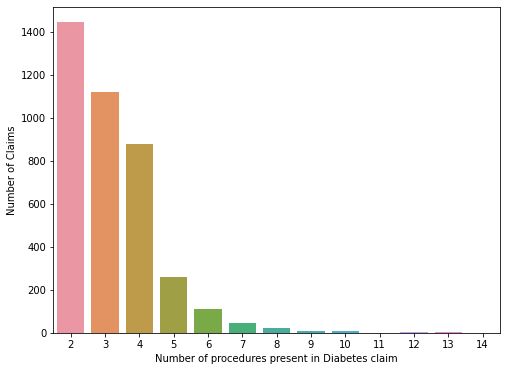

In [334]:
procedure_count = pd.DataFrame(procedures_diabetes['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=procedure_count)
ax.set_xlabel('Number of procedures present in Diabetes claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of procedures present in Diabetes claim')

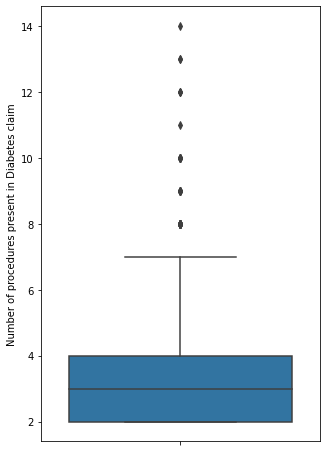

In [335]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=procedure_count)
ax.set_ylabel('Number of procedures present in Diabetes claim')

We will choose max length of 4.

In [338]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0.001, 
                            max_len = 4, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
17,0.959508,(LABORATORY-CHEMISTRY),1
25,0.599692,(LABORATORY-MICROSCOPY),1
148,0.595079,"(LABORATORY-CHEMISTRY, LABORATORY-MICROSCOPY)",2
19,0.561251,(LABORATORY-ENZYMES),1
143,0.558175,"(LABORATORY-CHEMISTRY, LABORATORY-ENZYMES)",2
...,...,...,...
901,0.001025,"(CONSULTATION, LABORATORY-ENDOCRINE / THYROID ...",4
1222,0.001025,"(LABORATORY-ENDOCRINE / THYROID FUNCTION, LABO...",4
1221,0.001025,"(LABORATORY-HEMATOLOGY, LABORATORY-BACTERIOLOG...",4
1220,0.001025,"(LABORATORY-ENDOCRINE / THYROID FUNCTION, LABO...",4


**Zhang's Metric**

In [339]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

In [346]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using a minium support threshold of 0.001
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules['zhang'] = zhangs_rule(rules)

# Apply metric thresholds
rules = rules[(rules['confidence'] > 0.9) &
                  (rules['zhang'] > 1)] 

# Print remaining rule
rules.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
7543,"(LABORATORY-HISTOPATHOLOGY, RADIOLOGY - XRAY, ...",(PAPSMEAR WITH CONSULTATION),0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
10710,(PAPSMEAR WITH CONSULTATION),"(CONSULTATION, LABORATORY-CHEMISTRY, LABORATOR...",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
10705,"(PAPSMEAR WITH CONSULTATION, LABORATORY-CHEMI...","(CONSULTATION, LABORATORY-HISTOPATHOLOGY)",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
10703,"(CONSULTATION, LABORATORY-CHEMISTRY, LABORATOR...",(PAPSMEAR WITH CONSULTATION),0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
10481,(PAPSMEAR WITH CONSULTATION),"(LABORATORY-HISTOPATHOLOGY, RADIOLOGY - ULTRAS...",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
8380,"(READERS FEE, LABORATORY-HISTOPATHOLOGY)","(PAPSMEAR WITH CONSULTATION, LABORATORY-HEMAT...",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
8377,"(PAPSMEAR WITH CONSULTATION, LABORATORY-HEMAT...","(READERS FEE, LABORATORY-HISTOPATHOLOGY)",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
8375,"(READERS FEE, LABORATORY-HISTOPATHOLOGY, LABOR...",(PAPSMEAR WITH CONSULTATION),0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
8354,(PAPSMEAR WITH CONSULTATION),"(READERS FEE, LABORATORY-HISTOPATHOLOGY, LABOR...",0.001281,0.001281,0.001281,1.0,780.4,0.00128,inf,1.0
